# Bike Sharing Assignment

------- 


## Importing the necessary libraries

In [14]:
#Warnings lib
import warnings
warnings.filterwarnings('ignore')

In [24]:
## Importing the dataset libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [31]:
## Visualize libraries
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set_style('ticks', {'axes.grid':True})

In [72]:
## Ml Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor ## to calculate VIF

## Reading and Understanding the Data

In [17]:
bike_data = pd.read_csv('day_1_use.csv')

In [18]:
bike_data.shape


(730, 16)

In [19]:
bike_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,29-10-2019,4,1,10,0,2,1,3,18.040000,21.97000,88.0000,23.999400,2,20,22
700,701,02-12-2019,4,1,12,0,1,1,2,14.247500,17.96040,82.3333,8.333393,892,3757,4649
629,630,22-09-2019,3,1,9,0,0,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
223,224,12-08-2018,3,0,8,0,0,0,1,29.041653,32.70210,41.5000,8.416607,1051,3854,4905
273,274,01-10-2018,4,0,10,0,1,1,2,16.810000,20.64315,75.3750,19.583832,480,1949,2429


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [21]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [26]:
### Removing unnecesary columns
bike_data.drop(['instant','casual','registered'], axis = 1, inplace = True)

## Instant - Because it is just for row numbering
## casual and registered - As our Target variable is sum of these two, hence, keeping it will create multi-collinearity issue.

In [27]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
## Changing the date format
bike_data['dteday'] = pd.to_datetime(bike_data.dteday, dayfirst=True)

Text(0, 0.5, 'Bike_rentals')

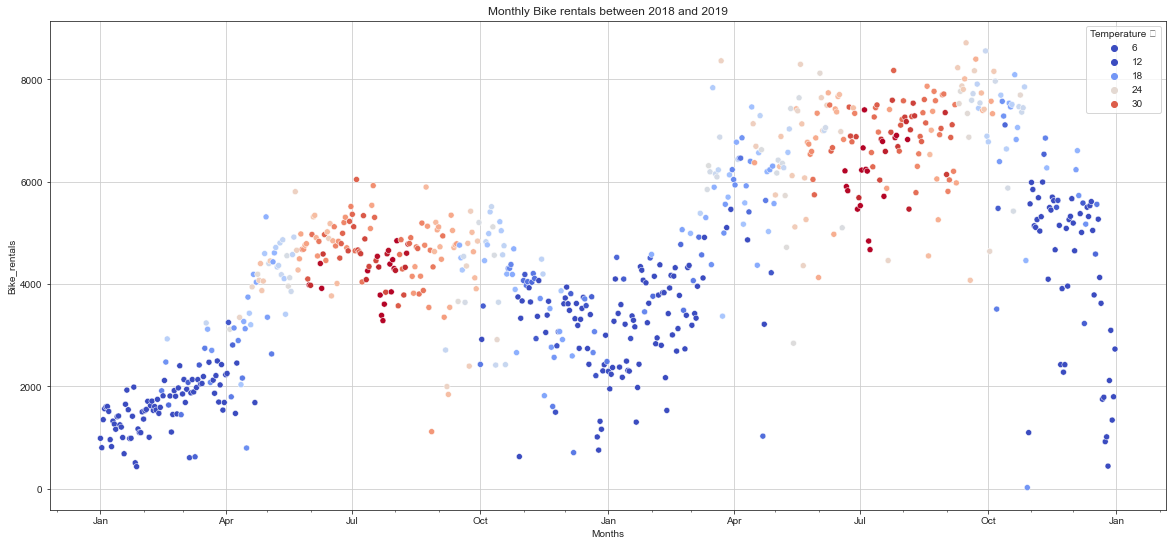

In [32]:
# scatter plot between date, temp and cnt
plt.figure(figsize=(20,9))
p = sns.color_palette('coolwarm', as_cmap=True, n_colors=5)
ax = sns.scatterplot(x=bike_data.dteday, y=bike_data.cnt, hue=bike_data.temp, hue_norm=(15,32),palette=p)
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.legend(title='Temperature \u2103') #u2103 --> degree-celsius
ax.set_title("Monthly Bike rentals between 2018 and 2019")
ax.set_xlabel('Months')
ax.set_ylabel('Bike_rentals')

In [42]:
## Relation between categorical variables

plt.figure(figsize=(5,4))
def category_plots(attribute):
    ax1 = bike_data.groupby(attribute).mean()['cnt'].plot.bar(color = 'black')
    ax1.set_title('Renatals v/s {}'.format(attribute))
    plt.tight_layout()
    plt.show()



<Figure size 360x288 with 0 Axes>

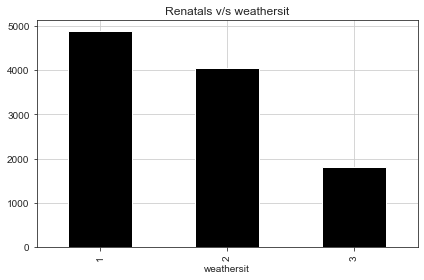

In [43]:
## Rentals vs Count
category_plots('weathersit')

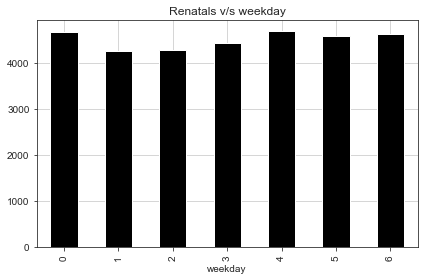

In [44]:
## Rentals vs weekdays
category_plots('weekday')

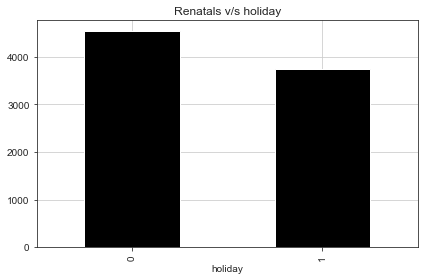

In [46]:
## Rentals vs holidays
category_plots('holiday')

In [47]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


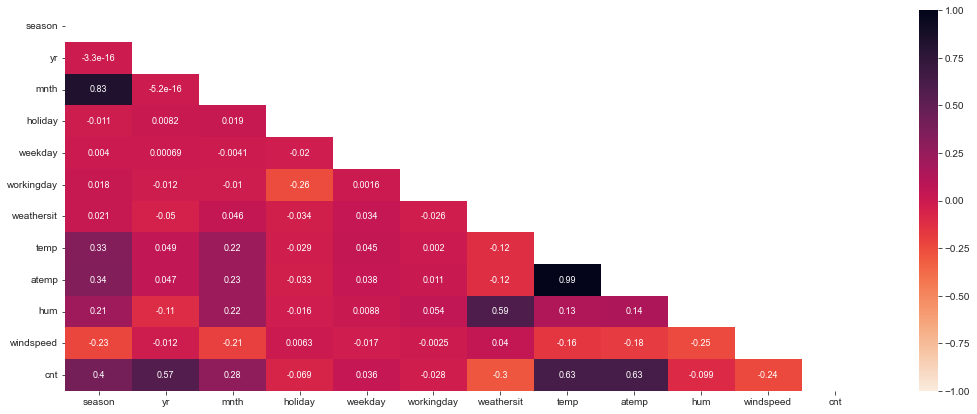

In [56]:
corr = bike_data.corr()
mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18,7))
with sns.axes_style('dark'):
    ax = sns.heatmap(corr,mask=mask, vmax=1, vmin=-1,cmap='rocket_r', annot=True, annot_kws={'fontsize':9})

## Feature Selection

As we see there is a 0.99 of correlation betwwen `temp` and `atemp`.
Hence, dropping `temp` as `atemp` is feeling temperature.

</br>

We will drop `temp` while building our model


### User Defined Functions 

**Helper functions to aid in analysis**

In [110]:
## Function1 - To select the columns
def drop_columns(to_drop, *df):
    x = [i.drop(to_drop, axis='columns') for i in df]
    if len(x) == 1: return x[0]
    else: return x

## Function2 - To Calculate VIF
def calc_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = vif.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    vif['VIF'] = round(vif['VIF'],2)
    return vif

def add_constant(*df):
## using 'add' flag to ensure SM does not treat columns with 
## same value like 'yr' as constant for certain slices of test-train set.
    x = [sm.add_constant(i, has_constant='add') for i in df]
    if len(x) == 1: return x[0]
    else: return x


def summary_with_vif(lr_SM_model):
    """
    Note: This function assumes that the following variables are already defined:
    'X_train_sm', 'X_test_sm', 'y_test'
    """
    vif_df = VIF(X_train_sm)
    line = '-'*10
    additions = [(9, line),
                 (10, '     VIF'),
                 (11,  line)]
    summary = str(lr_SM_model.summary2()).splitlines()
    # feature names start from 13th line, 
    for i, string in enumerate(summary[12:]):
        if '-'*60 in string: #if the line has a long series of '-', thats end of feature list
            additions.append((12+i, line))
            break
        feature = string.split()[0]
        vif = vif_df[vif_df['Features']==feature].VIF.round(2)
        additions.append((12+i, '   '+str(vif.item())))
    
    for index, value in additions:
        summary[index] += value
        
    print('\n'.join(summary))
    y_test_pred = lr_SM_model.predict(X_test_sm)
    r2_test = r2_score(y_test, y_test_pred).round(3)
    display(Latex(f'$R^{{2}}_{{train}}={lr_SM_model.rsquared.round(3)},\ R^{{2}}_{{test}}={r2_test}$'))


 ### Train Test Split

In [73]:
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.8, random_state=42) #1024
target = 'cnt'
y_train, y_test = bike_data_train[target], bike_data_test[target]

In [80]:
columns_1 = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X_train = bike_data_train[columns_1]

### Rescaling the features

**Here, we will rescale all the numerical features, so that 

In [66]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [77]:
## Applying the scaler function to numerical variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [78]:
bike_data_train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
247,2018-09-05,3,0,9,1,3,0,2,0.765327,0.717455,0.814513,0.475900,3351
335,2018-12-02,4,0,12,0,0,0,1,0.317788,0.331261,0.644911,0.195963,3940
702,2019-12-04,4,1,12,0,3,1,1,0.519232,0.511907,0.756118,0.379454,6606
440,2019-03-17,1,1,3,0,0,0,2,0.566998,0.559152,0.778874,0.220845,7836
136,2018-05-17,2,0,5,0,4,1,2,0.626185,0.603102,0.863461,0.637592,4123


### RFE


In [99]:
X_train = bike_data_train[columns_1]

In [100]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 8)             # running RFE # it needs two things model and number of variables
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

Selecting those variable which explains the `target variable` effectively as per `RFE`

In [202]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

#### Model-1 - Lm_1

In [103]:
X_train_rfe = X_train[col]

In [104]:
X_train_rfe = add_constant(X_train_rfe)

In [203]:
X_train_rfe.head()

,const,season,yr,holiday,weathersit,temp,atemp,hum,windspeed
247,1.0,3,0,1,2,0.765327,0.717455,0.814513,0.475900
335,1.0,4,0,0,1,0.317788,0.331261,0.644911,0.195963
702,1.0,4,1,0,1,0.519232,0.511907,0.756118,0.379454
440,1.0,1,1,0,2,0.566998,0.559152,0.778874,0.220845
136,1.0,2,0,0,2,0.626185,0.603102,0.863461,0.637592


In [96]:
y_train.head()

247    3351
335    3940
702    6606
440    7836
136    4123
Name: cnt, dtype: int64

In [106]:

X_train_rfe = sm.add_constant(X_train_rfe)

In [108]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit() 

In [118]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     257.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.16e-184
Time:                        21:24:21   Log-Likelihood:                -4809.0
No. Observations:                 584   AIC:                             9636.
Df Residuals:                     575   BIC:                             9675.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2043.5541    247.724      8.249      0.0

In [152]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns ## features colums

vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] ## calculating VIF

vif['VIF'] = round(vif['VIF'],2) ## rounding off to 2 decimal places


vif = vif.sort_values(by = 'VIF',ascending = False)

In [149]:
vif

,Features,VIF
8,atemp,1184.89
7,temp,1125.00
9,hum,28.17
0,season,24.22
2,mnth,17.40
6,weathersit,13.15
10,windspeed,4.83
5,workingday,3.44
4,weekday,3.16
1,yr,1.99


#### Model-2 - Lm_2

From Summary we can clearly see that, `temp` has p- value > 0.05, hence dropping that.

</br>
Rebuilding the model

In [183]:
X_train_new = X_train_rfe.drop(["temp"], axis = 1)

In [154]:

X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [155]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     295.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          7.17e-186
Time:                        00:38:25   Log-Likelihood:                -4809.1
No. Observations:                 584   AIC:                             9634.
Df Residuals:                     576   BIC:                             9669.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2057.4458    245.493      8.381      0.0

Checking the VIF values

**As we can see, removing `temp` was a good decision as it doesn't effect our $R^2$ and adj.$R^2$**

In [184]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.73
6,hum,1.83
4,weathersit,1.72
5,atemp,1.20
1,season,1.18
7,windspeed,1.15
2,yr,1.02
3,holiday,1.01


#### Model-3 - Lm_3

Dropping `holiday` as a measure to reduce the features in the model

In [139]:
X_train_new_1 = X_train_rfe.drop(["holiday",'temp'], axis = 1)

In [140]:
X_train_lm_2 = sm.add_constant(X_train_new_1)
lm_3 = sm.OLS(y_train,X_train_lm_2).fit()

In [141]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     336.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          7.85e-185
Time:                        22:49:09   Log-Likelihood:                -4814.5
No. Observations:                 584   AIC:                             9643.
Df Residuals:                     577   BIC:                             9674.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2001.0594    246.969      8.102      0.0


**There is a negligible change in r2 and adjusted r2 value, hence, it's okay to remove ``holiday``**


Cheking the VIF values

In [142]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.73
6,hum,1.83
4,weathersit,1.72
5,atemp,1.20
1,season,1.18
7,windspeed,1.15
2,yr,1.02
3,holiday,1.01


#### Moddel - 4 - lm_4



Removing `hum` as it's VIF value is ~ 2.
</br>
</br>
Also, Checking the model efficiency by reducing variables

In [143]:
X_train_new_2 = X_train_rfe.drop(["holiday",'temp','hum'], axis = 1)

In [144]:
X_train_lm_3 = sm.add_constant(X_train_new_2)
lm_4 = sm.OLS(y_train,X_train_lm_3).fit()

In [145]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     395.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          5.71e-184
Time:                        23:13:02   Log-Likelihood:                -4819.6
No. Observations:                 584   AIC:                             9651.
Df Residuals:                     578   BIC:                             9677.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1515.0663    195.802      7.738      0.0

In [147]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.69
4,atemp,1.17
1,season,1.16
5,windspeed,1.06
3,weathersit,1.02
2,yr,1.00


**As we see that removing `hum` from model decreases our $R^{2}$ and adj.$R^{2}$**

----

We have seen in the model_2 that is LM_2 has a $R^{2}$ of 78.2 and adj.$R^{2}$ of 77.9. </br>
Also, all the VIFs value are < 2.00

##### Hence, we will select Lm_2 as our final model

In [156]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     295.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          7.17e-186
Time:                        00:38:32   Log-Likelihood:                -4809.1
No. Observations:                 584   AIC:                             9634.
Df Residuals:                     576   BIC:                             9669.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2057.4458    245.493      8.381      0.0

## Residual analysis of our final model (Lm_2)

In [157]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

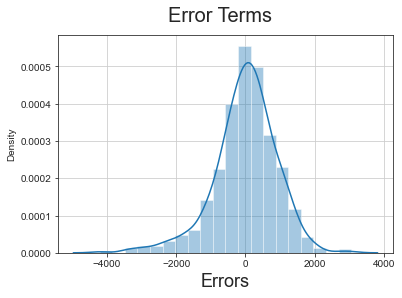

In [158]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

`Inference`

As we can see that, error terms are normally distributed and the mean is around 0.

Hence, our model is not violating any assumptions.

## Making Predictions


In [199]:
bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars]) 
## Transfroming the test data set as same as the training dataset

In [161]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [172]:
# Now let's use our model to make predictions.
X_train_new = X_train_rfe.drop(["temp",'const'], axis = 1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [174]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

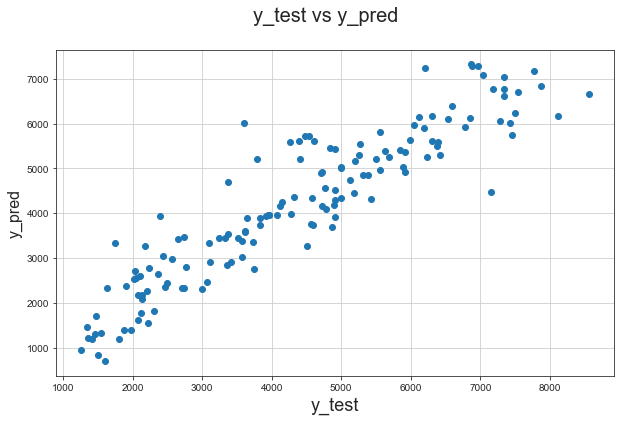

In [181]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = [10,6])
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [182]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8370305845589141

**So we get the following $R^2$ values:**

- Train Dataset - 0.782
- Test Dataset - 0.837